## Importing libraries for the Boston House Price Prediction Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Variables in order:

*   crim     per capita crime rate by town
*   zn       proportion of residential land zoned for lots over 25,000 sq.ft.
*   indus    proportion of non-retail business acres per town
*   chas     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   nox      nitric oxides concentration (parts per 10 million)
*   rm       average number of rooms per dwelling
*   age      proportion of owner-occupied units built prior to 1940
*   dis      weighted distances to five Boston employment centres
*   rad      index of accessibility to radial highways
*   tax      full-value property-tax rate per $10,000$'s
*   ptratio  pupil-teacher ratio by town
*   black        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   lstat    % lower status of the population
*   medv     Median value of owner-occupied homes in $1000's


## Read the boston house pricing csv file and check it's info and describe it

In [2]:
#Boston train set
boston_train = pd.read_csv("boston_train.csv")
boston_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
boston_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [4]:
boston_train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


## Preprocessing and EDA

In [5]:
boston_train.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
boston_train.duplicated().sum()

0

In [7]:
boston_train.nunique()

ID         333
crim       332
zn          25
indus       68
chas         2
nox         77
rm         308
age        260
dis        295
rad          9
tax         59
ptratio     42
black      237
lstat      310
medv       192
dtype: int64

In [8]:
boston_train['chas'].unique()

array([0, 1])

In [9]:
boston_train['rad'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [10]:
boston_train['zn'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  34. ,  33. ,  35. ])

In [11]:
boston_train['ptratio'].unique()

array([15.3, 17.8, 18.7, 15.2, 21. , 19.2, 18.3, 17.9, 16.8, 21.1, 17.3,
       15.1, 19.7, 18.6, 16.1, 18.9, 19. , 18.5, 18.2, 18. , 20.9, 19.1,
       21.2, 14.7, 16.6, 15.6, 12.6, 17. , 16.4, 17.4, 13. , 17.6, 14.9,
       13.6, 16. , 18.4, 19.6, 16.9, 20.2, 15.5, 15.9, 20.1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


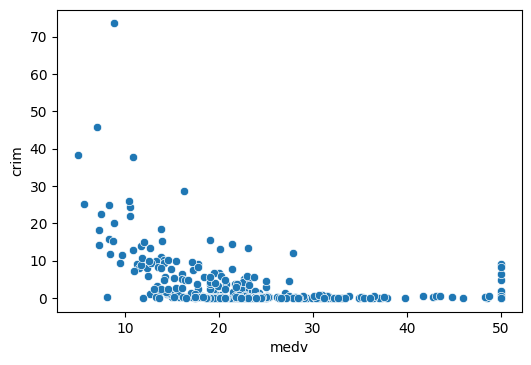

In [12]:
plt.figure(dpi=100)
sns.scatterplot(boston_train.medv, boston_train.crim)

* CRIM per capita crime rate by town decreases with decrease in MEDV Median value of owner-occupied homes in $1000's

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


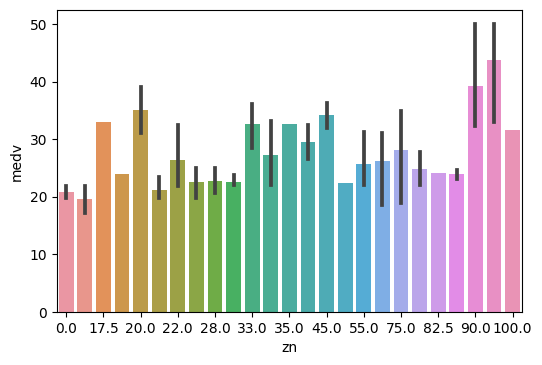

In [13]:
plt.figure(dpi=100)
ax = sns.barplot(boston_train.zn, boston_train.medv)
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
  if i%2==1:
    xticks[i].set_visible(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


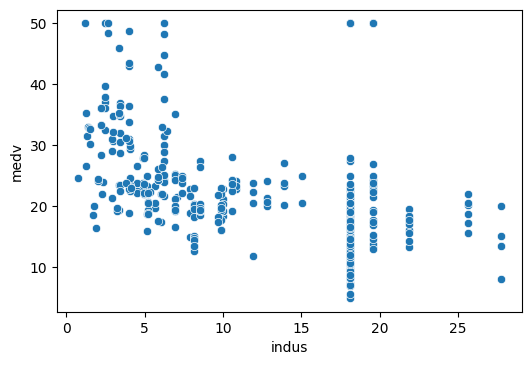

In [14]:
plt.figure(dpi=100)
ax = sns.scatterplot(boston_train.indus, boston_train.medv)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


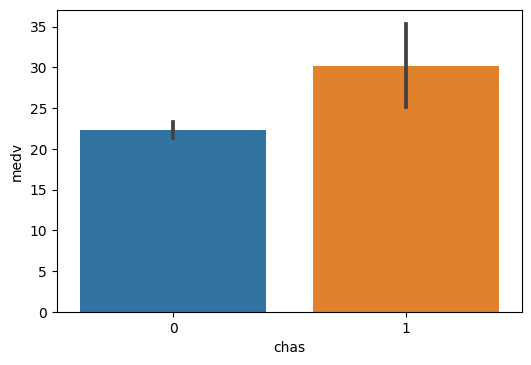

In [15]:
plt.figure(dpi=100)
ax = sns.barplot(boston_train.chas, boston_train.medv)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


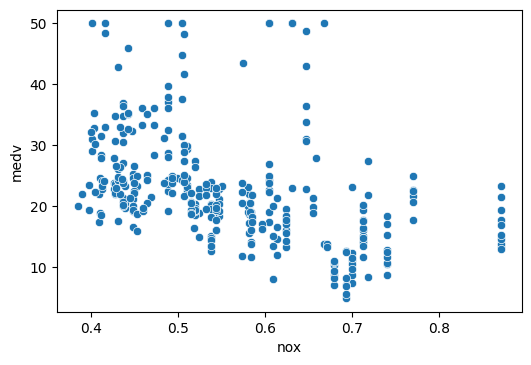

In [16]:
plt.figure(dpi=100)
sns.scatterplot(boston_train.nox, boston_train.medv)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


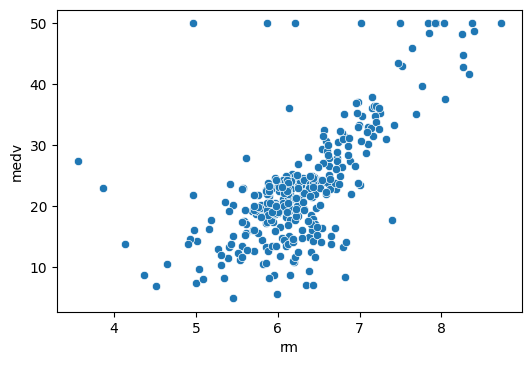

In [17]:
plt.figure(dpi=100)
sns.scatterplot(boston_train.rm, boston_train.medv)
#As rm increases medv increases

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


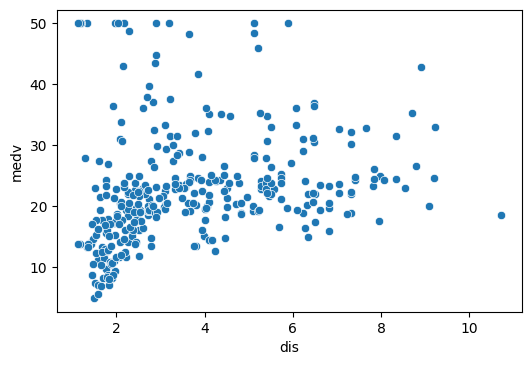

In [18]:
plt.figure(dpi=100)
sns.scatterplot(boston_train.dis, boston_train.medv)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


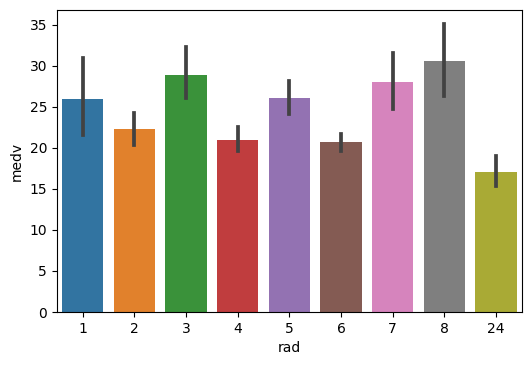

In [19]:
plt.figure(dpi=100)
sns.barplot(boston_train.rad, boston_train.medv)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


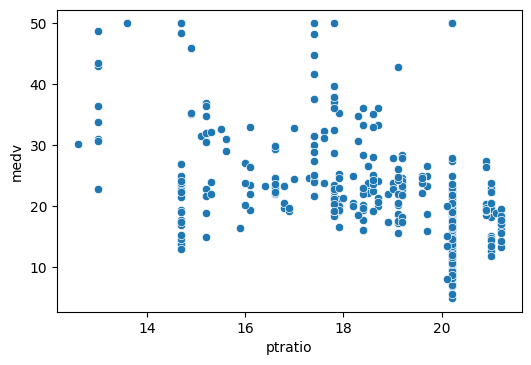

In [20]:
plt.figure(dpi=100)
sns.scatterplot(boston_train.ptratio, boston_train.medv)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


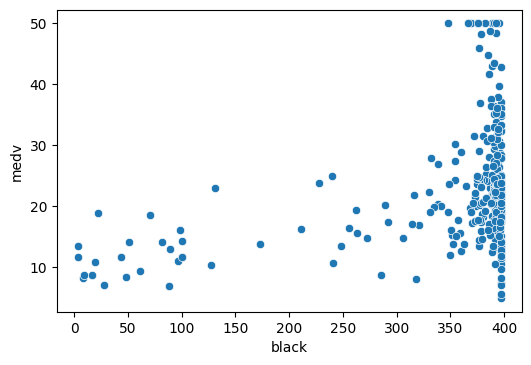

In [21]:
plt.figure(dpi=100)
sns.scatterplot(boston_train.black, boston_train.medv)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


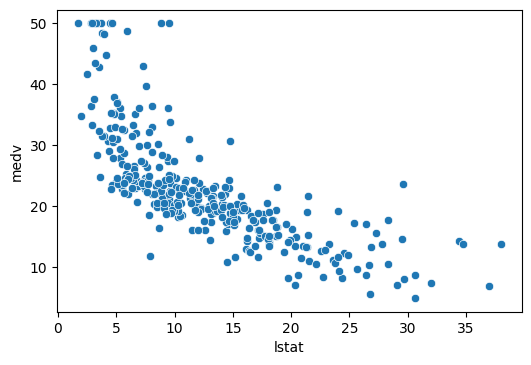

In [22]:
plt.figure(dpi=100)
sns.scatterplot(boston_train.lstat, boston_train.medv)
#Interpretation: lstat decreases with decrease in medv

In [23]:
dataset = [boston_train]
for data in dataset:
    data.loc[data['age'] <= 15, 'age'] = 0
    data.loc[(data['age'] > 15) & (data['age'] <= 30),'age'] = 1
    data.loc[(data['age'] > 30) & (data['age'] <= 45),'age'] = 2
    data.loc[(data['age'] > 45) & (data['age'] <= 60),'age'] = 3
    data.loc[data['age'] > 60, 'age'] = 4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


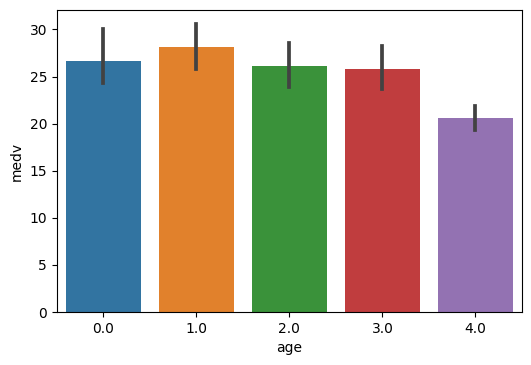

In [24]:
plt.figure(dpi=100)
sns.barplot(boston_train.age, boston_train.medv)
#Interpretation: medv decreases as age decreases

In [25]:
#Correlation between the data
boston_train.corr()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.215639,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.277936,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544829,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.494765,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.070837,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.611195,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.191553,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.215639,0.277936,-0.544829,0.494765,0.070837,0.611195,-0.191553,1.000000,-0.689012,0.360857,0.395282,0.207744,-0.220622,0.468825,-0.291614
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.689012,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.360857,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


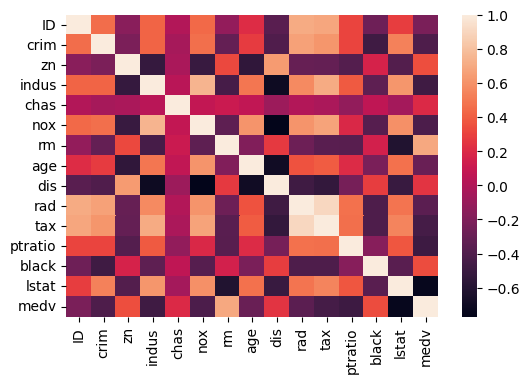

In [26]:
#Heatmap to view correlation
plt.figure(dpi=100)
sns.heatmap(boston_train.corr())

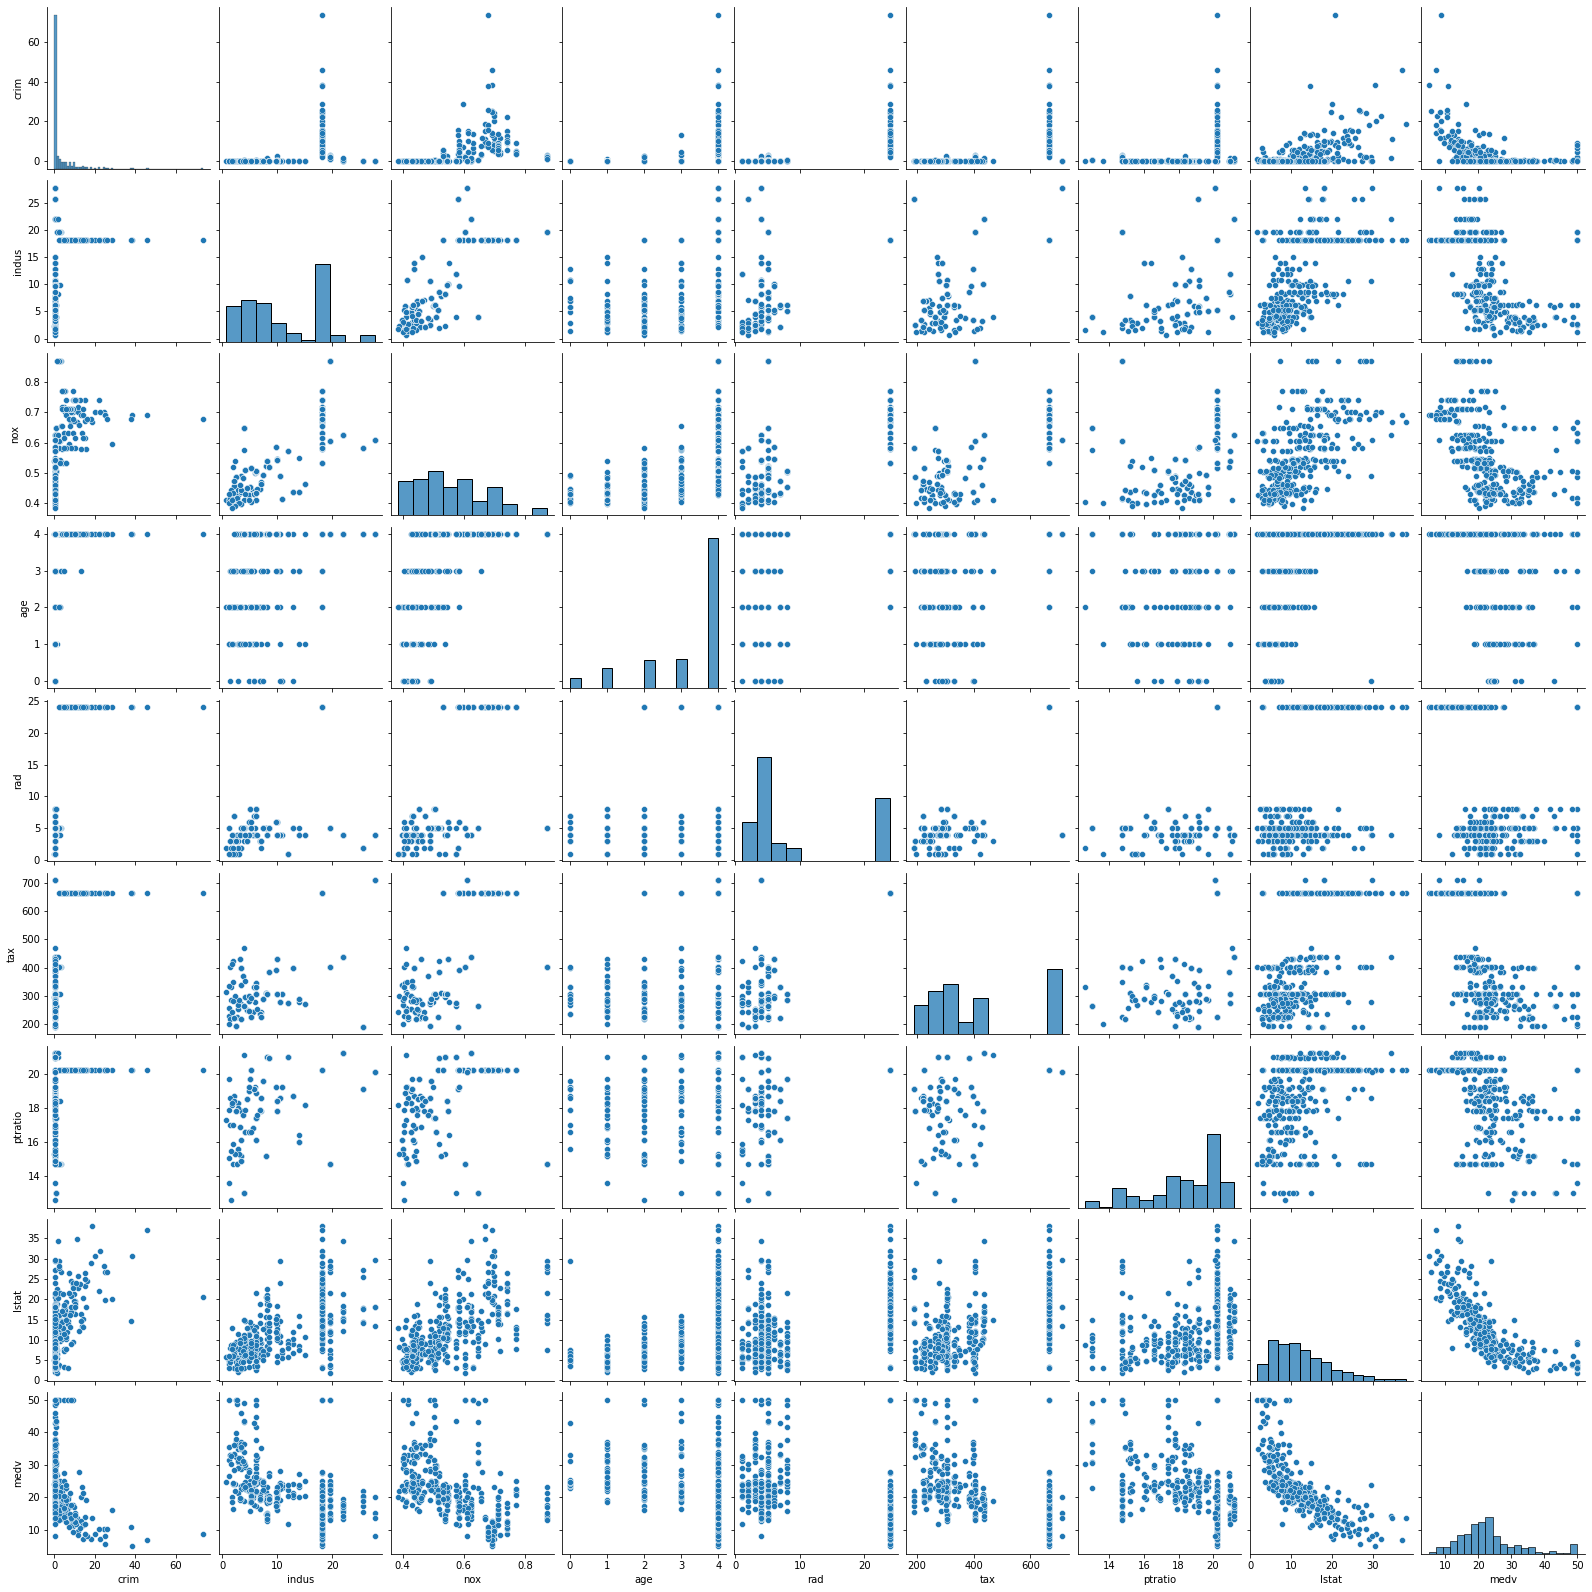

In [27]:
#Negative correlation pairplot
sns.pairplot(boston_train, vars=['crim','indus','nox','age','rad','tax','ptratio','lstat','medv'])

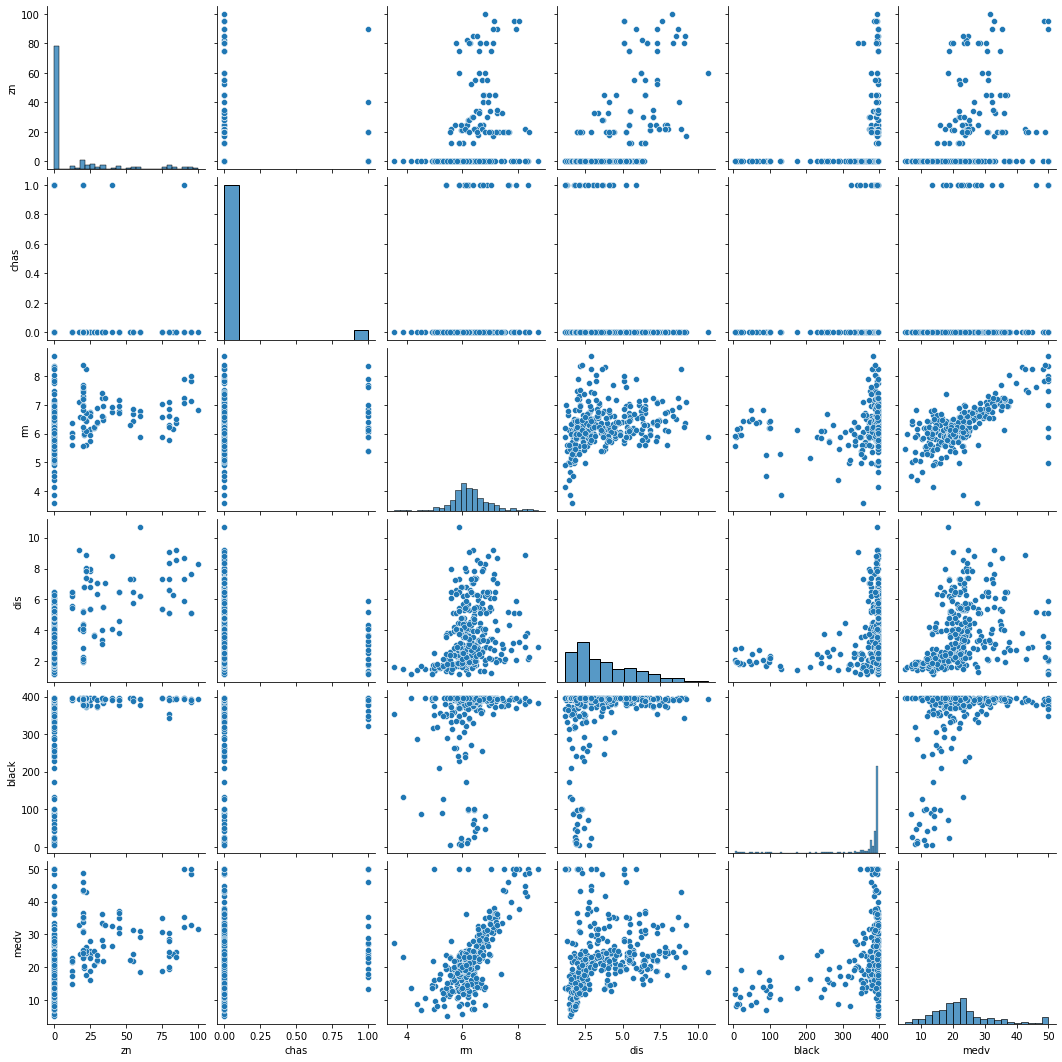

In [28]:
#Positive correlation pairplot
sns.pairplot(boston_train, vars=['zn','chas','rm','dis','black','medv'])

In [29]:
X_train = boston_train.iloc[:,1:-1].values
Y_train = boston_train.iloc[:,-1].values

In [30]:
print("Independent Variables Shape for Train  : ", X_train.shape)
print("Dependent Variables Shape for Train    : ", Y_train.shape)

Independent Variables Shape for Train  :  (333, 13)
Dependent Variables Shape for Train    :  (333,)


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 5)

In [32]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train, y_train)

Lasso(alpha=0.1)

In [33]:
y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

In [34]:
clf.coef_

array([-0.03249719,  0.04077667,  0.03499009,  3.24452508, -0.        ,
        3.54776441, -0.58113591, -1.24748193,  0.24114866, -0.01258102,
       -0.66748163,  0.01180768, -0.71314996])

In [35]:
clf.intercept_

25.915764908134115

In [36]:
print('Score on training data : ',clf.score(x_train, y_train))
print('Score on testing data : ',clf.score(x_test, y_test))

Score on training data :  0.7222954396811272
Score on testing data :  0.7201447697916195


In [37]:
from sklearn import metrics
print("Mean Absolute Error      :",metrics.mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error       :",metrics.mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error  :",metrics.mean_squared_error(y_test, y_pred_test, squared=False))
print("Explained Variance       :",metrics.explained_variance_score(y_test, y_pred_test))
print("Max Error                :",metrics.max_error(y_test, y_pred_test))
print("MAPE                     :",metrics.mean_absolute_percentage_error(y_test, y_pred_test))
print("MedAE                    :",metrics.median_absolute_error(y_test, y_pred_test))
print("R2 score                 :",metrics.r2_score(y_test, y_pred_test))

Mean Absolute Error      : 3.4206501756565317
Mean Squared Error       : 21.184873849025035
Root Mean Squared Error  : 4.602702885156181
Explained Variance       : 0.7203515524433164
Max Error                : 15.380691562739397
MAPE                     : 0.16041140601712434
MedAE                    : 2.6522308389925904
R2 score                 : 0.7201447697916195


In [38]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(x_train, y_train)

KernelRidge(alpha=1.0)

In [39]:
krr.get_params(deep=True)

{'alpha': 1.0,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'linear',
 'kernel_params': None}

In [40]:
print('Score on training data : ',krr.score(x_train, y_train))
print('Score on testing data : ',krr.score(x_test, y_test))

Score on training data :  0.7070733427598407
Score on testing data :  0.6959329131620331


In [41]:
y_pred_test = krr.predict(x_test)
y_pred_train = krr.predict(x_train)

In [42]:
from sklearn import metrics
print("Mean Absolute Error      :",metrics.mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error       :",metrics.mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error  :",metrics.mean_squared_error(y_test, y_pred_test, squared=False))
print("Explained Variance       :",metrics.explained_variance_score(y_test, y_pred_test))
print("Max Error                :",metrics.max_error(y_test, y_pred_test))
print("MAPE                     :",metrics.mean_absolute_percentage_error(y_test, y_pred_test))
print("MedAE                    :",metrics.median_absolute_error(y_test, y_pred_test))
print("R2 score                 :",metrics.r2_score(y_test, y_pred_test))

Mean Absolute Error      : 3.4732415507036722
Mean Squared Error       : 23.017696941044942
Root Mean Squared Error  : 4.797676202188404
Explained Variance       : 0.6965474029406078
Max Error                : 17.552560139703566
MAPE                     : 0.17121718774442676
MedAE                    : 2.4756900510052233
R2 score                 : 0.6959329131620331


## Now implementing the same for test dataset and submitting the result

In [43]:
boston_test = pd.read_csv('boston_test.csv')
boston_test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [44]:
X_boston_test = boston_test.drop(['ID'], axis=1).values

In [45]:
X = boston_test.iloc[:,1:].values

In [46]:
X.shape

(173, 13)

In [48]:
Y = clf.predict(X)

In [50]:
result = pd.DataFrame({'ID': boston_test['ID'], 'medv': Y[:]})
result.to_csv('./Result_Lasso.csv')
result.head()

,ID,medv
0,3,-2.729893
1,6,-6.485281
2,8,-36.500381
3,9,-48.661509
4,10,-30.628395


In [51]:
Y = krr.predict(X)

In [52]:
result = pd.DataFrame({'ID': boston_test['ID'], 'medv': Y[:]})
result.to_csv('./Result_Ridge.csv')
result.head()

,ID,medv
0,3,2.896016
1,6,-2.356886
2,8,-29.186272
3,9,-40.922227
4,10,-24.700788
